# Подключение библиотек

In [85]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [86]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

## Подключение наших датасетов

In [88]:
df_habr = pd.read_csv("habr.csv")

In [89]:
df_habr.head(5)

Unnamed: 0                                          Заголовок  \
0           0  Готовимся к встрече с Python 3.14: разбор супе...   
1           1                Разворачиваем GitLab за пару кликов   
2           2  Я — редактор. И боюсь, что меня заменит нейросеть   
3           3              Искусственный интеллект в киберзащите   
4           4  Termidesk Connect — следующий уровень управлен...   

       Название компании                                          Описание  \
0                    МТС                         Про жизнь и развитие в IT   
1                   OTUS              Цифровые навыки от ведущих экспертов   
2            Minervasoft  Платформа управления знаниями для команд и GenAI   
3  Positive Technologies            Лидер результативной кибербезопасности   
4           Группа Астра                                          Компания   

   Рейтинг                                          Категория        Дата  \
0  2354.20  Связь и телекоммуникации, Мобильные технологии...  2025-04-28   
1   529.34  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-28   
2   279.27  Программное обеспечение, Поисковые технологии,...  2025-04-28   
3   414.34  Веб-разработка, Программное обеспечение, Инфор...  2025-04-28   
4   106.17  Программное обеспечение, Аппаратное обеспечени...  2025-04-28   

                                               Текст  
0  Всем привет! С вами Леша Жиряков, техлид backe...  
1  GitLab является одним из самых популярных инст...  
2  Я помню, как весной 2024 года ИИ едва выдавал ...  
3  За последние несколько лет статус технологий и...  
4  Сейчас нелегко найти организацию — будь то цве...

In [90]:
df_json = pd.read_csv("ParsedJsons.csv")

In [91]:
df_json.head(5)

Заголовок       Название компании  \
0        NaN  Cybersport.Metaratings   
1        NaN         ESforce Holding   
2        NaN         ESforce Holding   
3        NaN         ESforce Holding   
4        NaN         ESforce Holding   

                                            Описание  Рейтинг Категория  \
0  Информационный сайт, который ежедневно публику...      NaN       NaN   
1  Одна из крупнейших киберспортивных организаций...      NaN       NaN   
2  Одна из крупнейших киберспортивных организаций...      NaN       NaN   
3  Одна из крупнейших киберспортивных организаций...      NaN       NaN   
4  Одна из крупнейших киберспортивных организаций...      NaN       NaN   

              Дата                                              Текст  
0  8 декабря 09:30  7 декабря состоялась церемония награждения лау...  
1  8 декабря 09:30  7 декабря состоялась церемония награждения лау...  
2    29 июля 13:50  Из совместного исследования издателя компьютер...  
3     9 июля 09:33  По статистике The Esports Observer за I полови...  
4  11 апреля 12:43  Компании SuperData Research и PayPal провели с...

In [92]:
df_pdf = pd.read_csv("PDFParsed.csv")

In [93]:
df_pdf.head(5)

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  
0  Подписаться Автор оригинала: Jingyu Wang Green...  
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...  
2  Еще до начала MWC в Барселоне было очевидно, ч...  
3  Автор оригинала: Yashwant Singh Взлом Instagra...  
4  Всем привет! Я уже писал статью о различных сп...

In [94]:
df = pd.concat([df_pdf, df_json, df_habr], axis=0, ignore_index=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Заголовок          50 non-null     object 
 1   Название компании  1162 non-null   object 
 2   Описание           1162 non-null   object 
 3   Рейтинг            343 non-null    float64
 4   Категория          343 non-null    object 
 5   Дата               1155 non-null   object 
 6   Текст              1162 non-null   object 
 7   Unnamed: 0         30 non-null     float64
dtypes: float64(2), object(6)
memory usage: 72.8+ KB


## Предварительная обработка данных 

- Перевод всех букв в тексте в нижний регистр
- Удаление знаков препинания
- Токенизация по словам
- Удаление стоп слов
- Стемминг (приведение слов к нормальной форме)
- Лемматизация

### Обработка данных

In [96]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

def remove_english(text):
    return re.sub(r'[a-zA-Z]', '', text)

In [97]:
df['Обработанный текст'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(remove_english(text.lower()))))) for text in df['Текст']]

# Удалить столбец Unnamed

In [98]:
df.head(2)

Заголовок Название компании  \
0  предназначенная для организации хранилищ данны...              OTUS   
1              Cocoapods, Carthage, SPM: как выбрать     red_mad_robot   

                                       Описание  Рейтинг      Категория  \
0          Цифровые навыки от ведущих экспертов   721.07           OTUS   
1  №1 в разработке цифровых решений для бизнеса   117.94  red_mad_robot   

             Дата                                              Текст  \
0   7 часов назад  Подписаться Автор оригинала: Jingyu Wang Green...   
1   6 часов назад  FAQ Старший iOS-разработчик Аня Кочешкова расс...   

   Unnamed: 0                                 Обработанный текст  
0         NaN  подписаться автор оригинала это массивно‑парал...  
1         NaN   старший разработчик аня кочешкова рассказывае...

In [99]:
df['Текст'][8]

'на примере Gitlab применять ее в работе. В статье рассматриваются базовые концепции CI и CD, а также этапы CI/CD-пайплайна. 5 мин zubarek Быстрое начало работы с Gitlab CI/CD: пайплайн для веб-сайта на AWS S3 Bucket 362 Блог компании , Тестирование IT-систем* , Системное администрирование* , Туториал Перевод От автора Мне повезло быть частью некоторых профессиональных команд, каждая из которых применяла несколько DevOps практик. И меня поразило то, как качество кода, скорость разработки и позитивный настрой команды коррелируют с CI/CD-пайплайном. По моему мнению, зрелость пайплайна может служить прекрасным показателем опытности разработчика, качества кода и эффективности всей команды. Во многих случаях, которые я наблюдал, пайплайны были выстроены либо DevOps-инженером, либо отдельной DevOps- командой. Да и последний отчет State of CD 2022 продемонстрировал, что только 22% разработчиков создают пайплайны. Моя цель — увеличить это число: помочь разработчикам взять на себя ответственнос

In [100]:
df['Обработанный текст'][8]

'на примере применять ее в работе в статье рассматриваются базовые концепции и а также этапы пайплайна мин быстрое начало работы с пайплайн для веб сайта на блог компании тестирование систем системное администрирование туториал перевод от автора мне повезло быть частью некоторых профессиональных команд каждая из которых применяла несколько практик и меня поразило то как качество кода скорость разработки и позитивный настрой команды коррелируют с пайплайном по моему мнению зрелость пайплайна может служить прекрасным показателем опытности разработчика качества кода и эффективности всей команды во многих случаях которые я наблюдал пайплайны были выстроены либо инженером либо отдельной командой да и последний отчет продемонстрировал что только разработчиков создают пайплайны моя цель увеличить это число помочь разработчикам взять на себя ответственность за пайплайны выстраивать непрерывный процесс доставки и создавать качественный код в статье рассматриваются фундаментальные концепции и чт

In [101]:
russian_stopwords = stopwords.words("russian")
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [102]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которые', 'с','своём','всем','наш', 'свой']) 

In [103]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [104]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [105]:
df.head()

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  Unnamed: 0  \
0  Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2  Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3  Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4  Всем привет! Я уже писал статью о различных сп...         NaN   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   

                              Токенизированный текст  
0  подписаться автор оригинала массивно‑параллель...  
1  старший разработчик аня кочешкова рассказывает...  
2  начала барселоне очевидно хотя оператор предст...  
3  автор оригинала взлом ‑аккаунта популярный зап...  
4  привет писал статью различных способах приходи...

In [106]:
df['Токенизированный текст'][8]

'примере применять работе статье рассматриваются базовые концепции также этапы пайплайна мин быстрое начало работы пайплайн веб сайта блог компании тестирование систем системное администрирование туториал перевод автора повезло частью некоторых профессиональных команд каждая которых применяла несколько практик поразило качество кода скорость разработки позитивный настрой команды коррелируют пайплайном моему мнению зрелость пайплайна служить прекрасным показателем опытности разработчика качества кода эффективности всей команды многих случаях наблюдал пайплайны выстроены либо инженером либо отдельной командой последний отчет продемонстрировал разработчиков создают пайплайны цель увеличить число помочь разработчикам взять ответственность пайплайны выстраивать непрерывный процесс доставки создавать качественный код статье рассматриваются фундаментальные концепции такое многие бизнесы применяют фреймворки позволяют менять приоритеты повышать скорость доставки кроме прочего подход улучшает а

### Просмотреть какое словов часто встречается в данный статье, и попробовать убрать его, и посмотреть, как сильно измениться текст

In [107]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['Стеммингированный текст'] = stem_list

In [108]:
df['Стеммингированный текст'][8]

'пример применя работ стат рассматрива базов концепц такж этап пайплайн мин быстр нача работ пайплайн веб сайт блог компан тестирован сист системн администрирован туториа перевод автор повезл част некотор профессиональн команд кажд котор применя нескольк практик пораз качеств код скорост разработк позитивн настр команд коррелир пайплайн мо мнен зрелост пайплайн служ прекрасн показател опытн разработчик качеств код эффективн все команд мног случа наблюда пайплайн выстро либ инженер либ отдельн команд последн отчет продемонстрирова разработчик созда пайплайн цел увелич числ помоч разработчик взят ответствен пайплайн выстраива непрерывн процесс доставк создава качествен код стат рассматрива фундаментальн концепц так мног бизнес применя фреймворк позволя меня приоритет повыша скорост доставк кром проч подход улучша атмосфер команд помога увелич прибыл ваш компан след пут принят культур философ практик станет больш преимуществ модн словечк последн десятилет сегодн счита настоя стандарт инду

In [109]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [110]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лемматизированный текст'] = lemm_texts_list

CPU times: total: 12min 52s
Wall time: 13min 11s


In [111]:
df["Лемматизированный текст"][8]

'пример применять работа статья рассматриваться базовый концепция также этап пайплайна мина быстрый начало работа пайплайна веб сайт блог компания тестирование система системный администрирование туториал перевод автор повезти часть некоторый профессиональный команда каждый который применять несколько практика поразить качество код скорость разработка позитивный настрой команда коррелировать пайплайн мой мнение зрелость пайплайна служить прекрасный показатель опытность разработчик качество код эффективность весь команда многий случай наблюдать пайплайна выстроить либо инженер либо отдельный команда последний отчёт продемонстрировать разработчик создавать пайплайна цель увеличить число помочь разработчик взять ответственность пайплайна выстраивать непрерывный процесс доставка создавать качественный код статья рассматриваться фундаментальный концепция такой многие бизнес применять фреймворк позволять менять приоритет повышать скорость доставка кроме прочее подход улучшать атмосфера коман

In [112]:
df.head(5)

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  Unnamed: 0  \
0  Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2  Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3  Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4  Всем привет! Я уже писал статью о различных сп...         NaN   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   

                              Токенизированный текст  \
0  подписаться автор оригинала массивно‑параллель...   
1  старший разработчик аня кочешкова рассказывает...   
2  начала барселоне очевидно хотя оператор предст...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  привет писал статью различных способах приходи...   

                             Стеммингированный текст  \
0  подписа автор оригина массивно‑параллельн баз ...   
1  старш разработчик ан кочешков рассказыва отлич...   
2  нача барселон очевидн хот оператор представ ам...   
3  автор оригина взлом ‑аккаунт популярн запрос п...   
4  привет писа стат различн способ приход использ...   

                             Лемматизированный текст  
0  подписаться автор оригинал массивно‑параллельн...  
1  старший разработчик аня кочешкова рассказывать...  
2  начало барселона очевидный хотя оператор предс...  
3  автор оригинал взлом ‑аккаунт популярный запро...  
4  привет писать статья различный способ приходит...

In [113]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['Стеммингированный текст'] = stem_list

In [114]:
df["Стеммингированный текст"][8]

'пример применя работ стат рассматрива базов концепц такж этап пайплайн мин быстр нача работ пайплайн веб сайт блог компан тестирован сист системн администрирован туториа перевод автор повезл част некотор профессиональн команд кажд котор применя нескольк практик пораз качеств код скорост разработк позитивн настр команд коррелир пайплайн мо мнен зрелост пайплайн служ прекрасн показател опытн разработчик качеств код эффективн все команд мног случа наблюда пайплайн выстро либ инженер либ отдельн команд последн отчет продемонстрирова разработчик созда пайплайн цел увелич числ помоч разработчик взят ответствен пайплайн выстраива непрерывн процесс доставк создава качествен код стат рассматрива фундаментальн концепц так мног бизнес применя фреймворк позволя меня приоритет повыша скорост доставк кром проч подход улучша атмосфер команд помога увелич прибыл ваш компан след пут принят культур философ практик станет больш преимуществ модн словечк последн десятилет сегодн счита настоя стандарт инду

In [115]:
df.head(5)

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  Unnamed: 0  \
0  Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2  Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3  Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4  Всем привет! Я уже писал статью о различных сп...         NaN   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   

                              Токенизированный текст  \
0  подписаться автор оригинала массивно‑параллель...   
1  старший разработчик аня кочешкова рассказывает...   
2  начала барселоне очевидно хотя оператор предст...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  привет писал статью различных способах приходи...   

                             Стеммингированный текст  \
0  подписа автор оригина массивно‑параллельн баз ...   
1  старш разработчик ан кочешков рассказыва отлич...   
2  нача барселон очевидн хот оператор представ ам...   
3  автор оригина взлом ‑аккаунт популярн запрос п...   
4  привет писа стат различн способ приход использ...   

                             Лемматизированный текст  
0  подписаться автор оригинал массивно‑параллельн...  
1  старший разработчик аня кочешкова рассказывать...  
2  начало барселона очевидный хотя оператор предс...  
3  автор оригинал взлом ‑аккаунт популярный запро...  
4  привет писать статья различный способ приходит...

In [116]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [117]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лемматизированный текст'] = lemm_texts_list

CPU times: total: 13min 27s
Wall time: 15min 11s


In [118]:
df['Лемматизированный текст'][8]

'пример применять работа статья рассматриваться базовый концепция также этап пайплайна мина быстрый начало работа пайплайна веб сайт блог компания тестирование система системный администрирование туториал перевод автор повезти часть некоторый профессиональный команда каждый который применять несколько практика поразить качество код скорость разработка позитивный настрой команда коррелировать пайплайн мой мнение зрелость пайплайна служить прекрасный показатель опытность разработчик качество код эффективность весь команда многий случай наблюдать пайплайна выстроить либо инженер либо отдельный команда последний отчёт продемонстрировать разработчик создавать пайплайна цель увеличить число помочь разработчик взять ответственность пайплайна выстраивать непрерывный процесс доставка создавать качественный код статья рассматриваться фундаментальный концепция такой многие бизнес применять фреймворк позволять менять приоритет повышать скорость доставка кроме прочее подход улучшать атмосфера коман

# Облако слов

In [119]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [120]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\rusla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [176]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

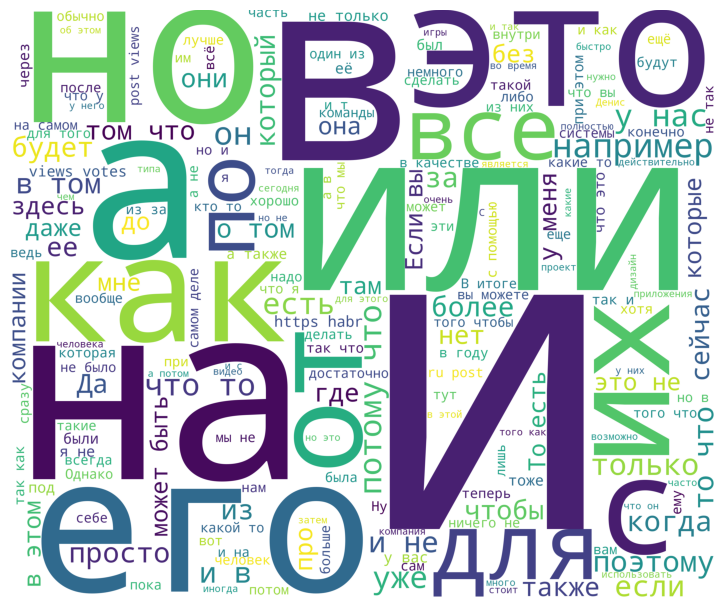

In [177]:
corpus = get_corpus(df['Текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

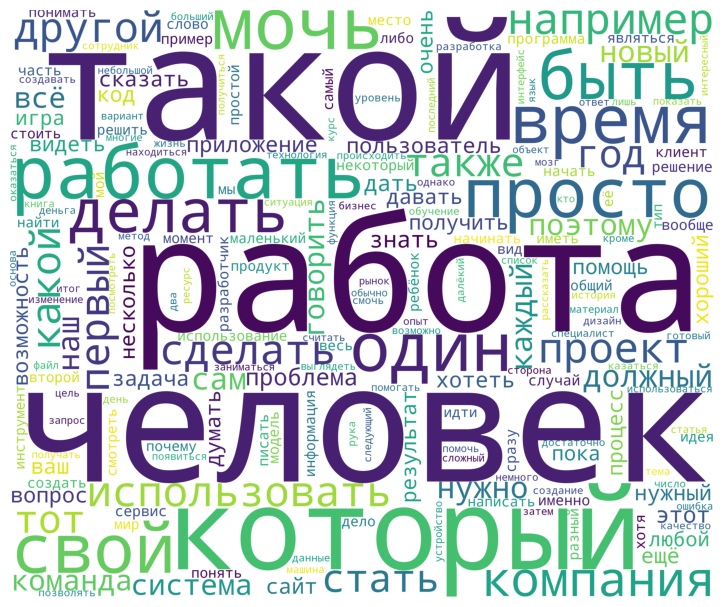

In [178]:
corpus = get_corpus(df['Лемматизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [124]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='silver',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

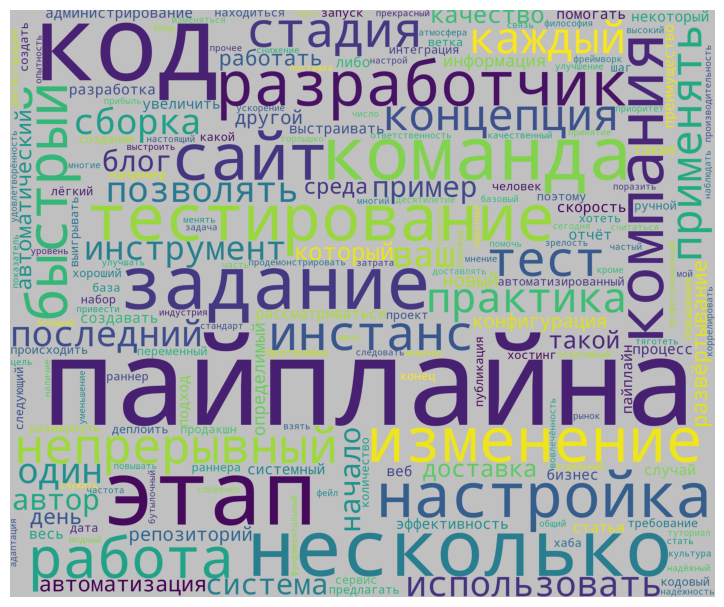

In [125]:
corpus = df['Лемматизированный текст'][8]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [126]:
df['Лемматизированный текст'][8]

'пример применять работа статья рассматриваться базовый концепция также этап пайплайна мина быстрый начало работа пайплайна веб сайт блог компания тестирование система системный администрирование туториал перевод автор повезти часть некоторый профессиональный команда каждый который применять несколько практика поразить качество код скорость разработка позитивный настрой команда коррелировать пайплайн мой мнение зрелость пайплайна служить прекрасный показатель опытность разработчик качество код эффективность весь команда многий случай наблюдать пайплайна выстроить либо инженер либо отдельный команда последний отчёт продемонстрировать разработчик создавать пайплайна цель увеличить число помочь разработчик взять ответственность пайплайна выстраивать непрерывный процесс доставка создавать качественный код статья рассматриваться фундаментальный концепция такой многие бизнес применять фреймворк позволять менять приоритет повышать скорость доставка кроме прочее подход улучшать атмосфера коман

# Векторизация текстовых данных

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
vectorizer = CountVectorizer()
vectorizer.fit(df['Лемматизированный текст'])

CountVectorizer()

In [129]:
print(vectorizer.vocabulary_)

{'подписаться': 31992, 'автор': 286, 'оригинал': 27936, 'массивно': 20757, 'параллельный': 29490, 'база': 1969, 'данные': 9113, 'открытый': 28532, 'исходный': 15487, 'код': 17012, 'аналитик': 1004, 'случай': 42232, 'другой': 11184, 'субд': 44447, 'требовать': 46337, 'регулярный': 38729, 'оптимизация': 27793, 'запрос': 13116, 'корректировка': 18088, 'распределение': 38194, 'ресурс': 39173, 'защита': 13652, 'статья': 43867, 'рассмотреть': 38294, 'пять': 37109, 'рекомендация': 38929, 'обязательный': 26942, 'эффективный': 52578, 'управление': 47751, 'правильно': 34060, 'подбирать': 31594, 'политика': 32662, 'рассматривать': 38288, 'адаптация': 416, 'расширять': 38489, 'возможность': 5705, 'внедрять': 5470, 'операция': 27644, 'параллелизм': 29484, 'обеспечить': 26320, 'выполнение': 6953, 'распределять': 38199, 'дать': 9178, 'множество': 22110, 'машина': 20914, 'называть': 23285, 'сегмент': 40953, 'предоставлять': 34291, 'пользователь': 32928, 'выбрать': 6566, 'три': 46459, 'метод': 21430, '

In [130]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Лемматизированный текст'])

In [131]:
count_matrix.shape

(1162, 246363)

In [132]:
vectorizer.get_feature_names_out()[45000:46000]

array(['должный сопроводить', 'должный составить',
       'должный составить около', 'должный составлять',
       'должный состоять', 'должный состояться',
       'должный состояться следующий', 'должный сохранить',
       'должный социальный', 'должный спасти', 'должный спасти матушка',
       'должный специальный', 'должный специальный гравировка',
       'должный список', 'должный способ', 'должный способ убивать',
       'должный спрашивать', 'должный сработать', 'должный сразу',
       'должный ставить', 'должный стараться', 'должный стать',
       'должный степень', 'должный стоить', 'должный столько',
       'должный столько классный', 'должный стоять', 'должный страдать',
       'должный стремиться', 'должный строго', 'должный строить',
       'должный строить культура', 'должный строиться',
       'должный структура', 'должный структура вакансия',
       'должный суметь', 'должный сформировать', 'должный сформулировать',
       'должный сюда', 'должный сюда прийти', 'должный т

In [133]:
vectorizer.get_feature_names_out()[10000]

'буквально следующий перенос'

In [134]:
vectorizer.get_feature_names_out()[214518]

'сущность ключевой'

In [135]:
print(count_matrix)

  (0, 139376)	1
  (0, 535)	1
  (0, 123002)	1
  (0, 131139)	2
  (0, 4408)	15
  (0, 36046)	43
  (0, 126520)	1
  (0, 69344)	1
  (0, 74430)	1
  (0, 2495)	2
  (0, 198538)	2
  (0, 213760)	2
  (0, 221845)	3
  (0, 181537)	4
  (0, 122073)	5
  (0, 55706)	34
  (0, 80662)	2
  (0, 178893)	19
  (0, 183123)	1
  (0, 57510)	1
  (0, 210521)	2
  (0, 179623)	1
  (0, 171475)	1
  (0, 182589)	1
  (0, 118746)	1
  :	:
  (1161, 98581)	1
  (1161, 115162)	1
  (1161, 65078)	1
  (1161, 45868)	1
  (1161, 168303)	1
  (1161, 26118)	1
  (1161, 37564)	1
  (1161, 59954)	1
  (1161, 54676)	1
  (1161, 144180)	9
  (1161, 227517)	1
  (1161, 142408)	1
  (1161, 179756)	1
  (1161, 63437)	1
  (1161, 60822)	1
  (1161, 131921)	1
  (1161, 124397)	1
  (1161, 245335)	1
  (1161, 118744)	1
  (1161, 143250)	1
  (1161, 212752)	1
  (1161, 170876)	1
  (1161, 19625)	1
  (1161, 10725)	2
  (1161, 132744)	1


# TF-IDF

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=11000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [138]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лемматизированный текст'])

CPU times: total: 41 s
Wall time: 43.1 s


In [139]:
tfidf_matrix.shape

(1162, 11000)

In [140]:
tfidf_vectorizer.get_feature_names_out()[:200]

array(['ааа', 'аббревиатура', 'абзац', 'абсолютно', 'абсолютный',
       'абстрагироваться', 'абстрактный', 'абстракция', 'абсурдный',
       'аварийный', 'авария', 'аватар', 'август', 'август год',
       'авиакомпания', 'авить', 'австралия', 'авто', 'автобус', 'автомат',
       'автоматизация', 'автоматизация процесс',
       'автоматизация тестирование', 'автоматизированный',
       'автоматизировать', 'автоматически', 'автоматический',
       'автомобиль', 'автомобильный', 'автономность', 'автономный',
       'автопилот', 'автор', 'автор книга', 'авторизация', 'авторитет',
       'авторитетный', 'авторский', 'авторский право', 'автотест', 'ага',
       'агент', 'агентство', 'агентство тасс', 'агрегатор',
       'агрегатор такси', 'агрессивный', 'агрессия', 'ад', 'адаптация',
       'адаптер', 'адаптивный', 'адаптировать', 'адаптироваться',
       'адекватно', 'адекватный', 'адепт', 'админ', 'административный',
       'администратор', 'администрация', 'администрирование', 'админк',


In [141]:
print(tfidf_matrix)

  (0, 5583)	0.022101560525494054
  (0, 1665)	0.023123116026596984
  (0, 3670)	0.014796962264282785
  (0, 8860)	0.022844212426176413
  (0, 4783)	0.022844212426176413
  (0, 5192)	0.019715792885198268
  (0, 1305)	0.031152965623878474
  (0, 7259)	0.019106120889258015
  (0, 5106)	0.013172480942445306
  (0, 2443)	0.020425829492134808
  (0, 10051)	0.022844212426176413
  (0, 4217)	0.015678169995526865
  (0, 3602)	0.021091992565804508
  (0, 8185)	0.020915580075289292
  (0, 6601)	0.018993867671290684
  (0, 4385)	0.041831160150578584
  (0, 7457)	0.020915580075289292
  (0, 7600)	0.01699053534105734
  (0, 5730)	0.03125405463376337
  (0, 1771)	0.020915580075289292
  (0, 8585)	0.012432862742068987
  (0, 6385)	0.021091992565804508
  (0, 10622)	0.02012767639036095
  (0, 7888)	0.022844212426176413
  (0, 139)	0.023123116026596984
  :	:
  (1161, 3022)	0.006848620783448322
  (1161, 10620)	0.019371208387660727
  (1161, 502)	0.033954635094493237
  (1161, 1151)	0.007622806801558676
  (1161, 5238)	0.0441613056

In [142]:
import pickle

with open ('vectorizer_3df.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Кластеризация

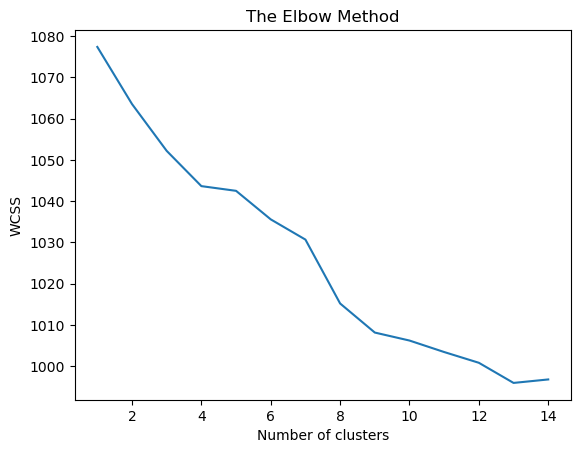

In [143]:
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
kmeans = KMeans(init='k-means++', n_clusters=9, n_init=28)
kmeans.fit(X)
pred=kmeans.fit_predict(X)

In [145]:
df['Кластер'] = pd.Series(pred)

In [146]:
df

Заголовок  \
0     предназначенная для организации хранилищ данны...   
1                 Cocoapods, Carthage, SPM: как выбрать   
2     как даже давние игроки видят в нем спасительно...   
3                                 Cloud4Y 5 часов назад   
4     работы. Инструмент достаточно пожилой (первый ...   
...                                                 ...   
1157  В центре внимания Java: Local Variable Type In...   
1158  Первые вызовы и много шуток: что скрыто в бесп...   
1159                          Мой путь к удаленке в Гоа   
1160  Единый механизм указания значений по умолчанию...   
1161  Введение в концепцию «потока» в левел-дизайне ...   

               Название компании  \
0                           OTUS   
1                  red_mad_robot   
2     Технократия @technokratiya   
3                        Cloud4Y   
4             Alex Kup @Lifailon   
...                          ...   
1157                   Axiom JDK   
1158            Яндекс Практикум   
1159               Online patent   
1160                       Флант   
1161                        OTUS   

                                               Описание  Рейтинг  \
0                  Цифровые навыки от ведущих экспертов   721.07   
1          №1 в разработке цифровых решений для бизнеса   117.94   
2                                           ИТ-Компания     4.40   
3                   #1 Корпоративный облачный провайдер    71.07   
4     источников журналов (не только файлов), поддер...     2.00   
...                                                 ...      ...   
1157                        на страже безопасности Java    75.61   
1158                               Помогаем людям расти   105.08   
1159                          Ваш личный патентный офис   290.95   
1160                 Специалисты по DevOps и Kubernetes   245.51   
1161               Цифровые навыки от ведущих экспертов   529.34   

                                              Категория            Дата  \
0                                                  OTUS   7 часов назад   
1                                         red_mad_robot   6 часов назад   
2                            Технократия @technokratiya             NaN   
3                                               Cloud4Y   5 часов назад   
4                                    Alex Kup @Lifailon             NaN   
...                                                 ...             ...   
1157  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1158                        Веб-разработка, Веб-сервисы      2025-04-28   
1159                Консалтинг и поддержка, Веб-сервисы      2025-04-28   
1160  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1161  Консалтинг и поддержка, Рекрутинг и HR, Произв...      2025-04-28   

                                                  Текст  Unnamed: 0  \
0     Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1     FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2     Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3     Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4     Всем привет! Я уже писал статью о различных сп...         NaN   
...                                                 ...         ...   
1157  Команда Axiom JDK подготовила перевод статьи п...        25.0   
1158  Привет! Это команда Яндекс Практикума. Первые ...        26.0   
1159  закат в АрамболеПривет, Habr! Меня зовут Ксени...        27.0   
1160  В Kubernetes важно правильно настроить Storage...        28.0   
1161  Методы проектирования эффективного потока уров...        29.0   

                                     Обработанный текст  \
0     подписаться автор оригинала это массивно‑парал...   
1      старший разработчик аня кочешкова рассказывае...   
2     еще до начала в барселоне было очевидно что хо...   
3     автор оригинала взлом ‑аккаунта популярный зап...   
4     всем привет я уже писал статью о

In [147]:
def get_cloudwords_by_claster(claster):
    claster_df = df[df['Кластер'] == claster]
    corpus = get_corpus(claster_df['Лемматизированный текст'].values)
    return WordCloud(background_color='white',
                          stopwords=STOPWORDS,
                          width=2500,
                          height=2000,
                          max_words=200,
                          random_state=42
                         ).generate(str_corpus(corpus))

			1 кластер


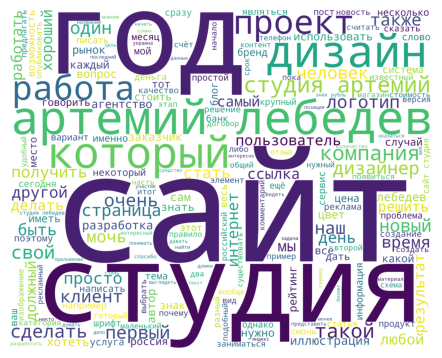

			2 кластер


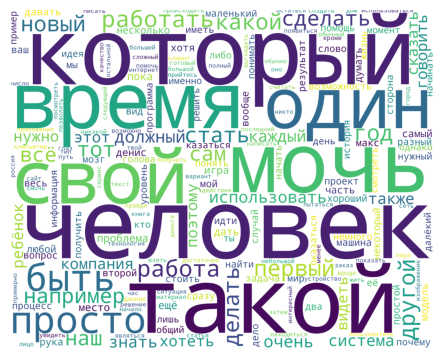

			3 кластер


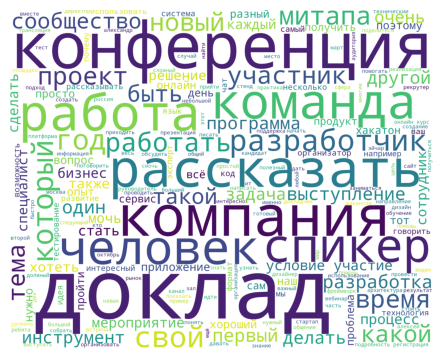

			4 кластер


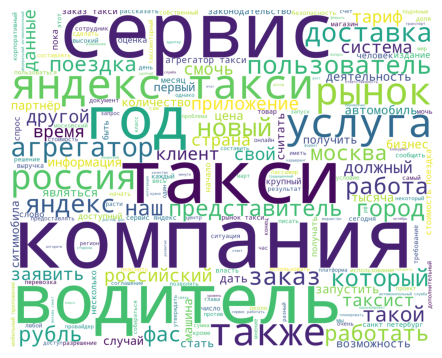

			5 кластер


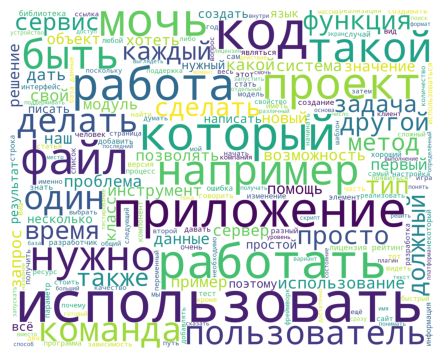

			6 кластер


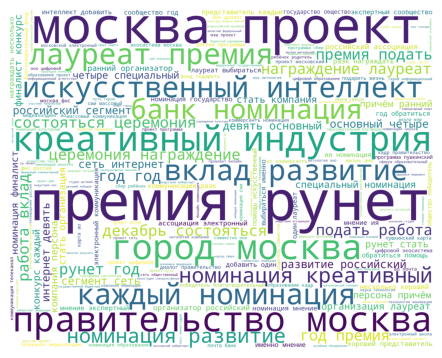

			7 кластер


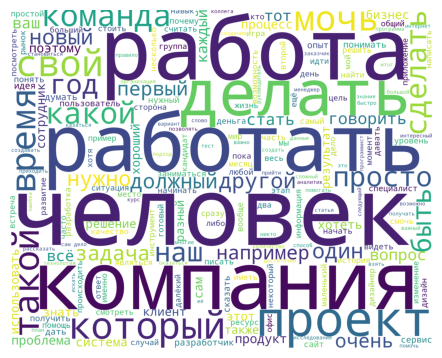

			8 кластер


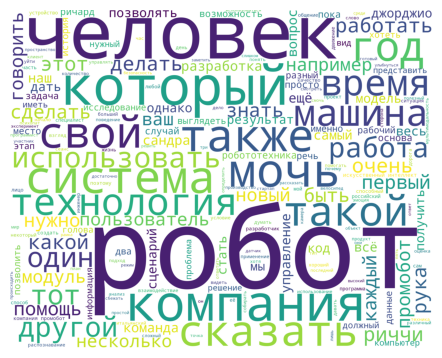

			9 кластер


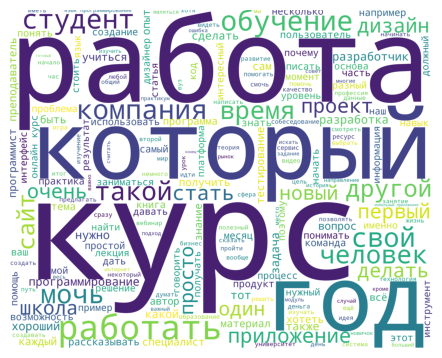

In [148]:
for i in range(df["Кластер"].nunique()):
    print(f"\t\t\t{i+1} кластер")
    cloud = get_cloudwords_by_claster(i)
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [149]:
# Даем название
names = {0: "Работа с дизайном", 1: "работа программиста", 2: "Сервис заказов", 3: "Создание проекта", 4: "Создание приложения", 5: "Курсы для студентов", 6: "Стажировка", 7: "Турагенство", 8: "Челове и технологии"}
def give_cluster_name():
    df["Категория кластера"] = df['Кластер'].map(names)
give_cluster_name()

In [150]:
print(names)

{0: 'Работа с дизайном', 1: 'работа программиста', 2: 'Сервис заказов', 3: 'Создание проекта', 4: 'Создание приложения', 5: 'Курсы для студентов', 6: 'Стажировка', 7: 'Турагенство', 8: 'Челове и технологии'}


In [77]:
# df.drop("Кластер", axis = 1, inplace = True) 

In [79]:
df.drop("Unnamed: 0", axis = 1, inplace = True) 

In [80]:
df.head(10)

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   
5  устройства пользователей. Приложение непреднам...   
6  Просто для того, чтобы вы знали, откуда может ...   
7                                  на собеседовании.   
8  CI/CD, чтобы быстро вникнуть в основы технолог...   
9                                     Другие новости   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   
5             Денис @denis-19   
6                     Cloud4Y   
7                        OTUS   
8                 Southbridge   
9               @AnnieBronson   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   
5                        Информационная служба Хабра   722.90   
6                #1 Корпоративный облачный провайдер    71.07   
7               Цифровые навыки от ведущих экспертов   721.07   
8   Обеспечиваем стабильную работу highload-проектов   280.79   
9                        Информационная служба Хабра   145.10   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   
5             Денис @denis-19             NaN   
6                     Cloud4Y   5 часов назад   
7                        OTUS  10 часов назад   
8                 Southbridge    2 часа назад   
9               @AnnieBronson  59 минут назад   

                                               Текст  \
0  Подписаться Автор оригинала: Jingyu Wang Green...   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...   
2  Еще до начала MWC в Барселоне было очевидно, ч...   
3  Автор оригинала: Yashwant Singh Взлом Instagra...   
4  Всем привет! Я уже писал статью о различных сп...   
5  Windows 11 24H2, который приводил к удалению И...   
6  OSINT & Hacking — как работает фишинг для нель...   
7  5 вопросов на собеседовании Простой 8 мин 837 ...   
8  на примере Gitlab применять ее в работе. В ста...   
9  Митчелл Бейкер, гендиректор Mozilla с 2020 год...   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   
5   который приводил к удалению ии помощника эта ...   
6   как работает фишинг для нельзяграма блог комп...   
7   вопросов на собеседовании простой мин блог ко...   
8  на примере применять ее в работе в статье расс...   
9  митчелл бейкер гендиректор с года объявила что...   

                              Токенизированный текст  \
0  подписаться автор оригинала массивно‑параллель...   
1  старший разработчик аня кочешкова рассказывает...   
2  начала барселоне очевидно хотя оператор предст...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  привет писал статью различных способах приходи...   
5  приводил удалению ии помощника эта проблема ус...   
6  работает фишинг нельзяграма блог компании инфо...   
7  вопросов собеседовании простой мин блог компан...   
8  примере применять работе статье рассматриваютс...   
9  митчелл б

# Тематическое моделирование

In [81]:
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import gensim

In [155]:
from sklearn.decomposition import TruncatedSVD

###  Подготовка датасета

In [82]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.4, max_features=10000,
                             min_df=0.01, stop_words=russian_stopwords,
                             ngram_range=(1,3))

In [83]:
def print_themes_and_titles(df):
    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform(df['Токенизированный текст'])
        lsa_model = TruncatedSVD(n_components=5, random_state=0)
        lsa_model.fit(tfidf_matrix)
        # вывод топ слов для каждой темы
        for i, topic in enumerate(lsa_model.components_):
            print(f"Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")
    except ValueError as e:
        print(f"Ошибка: {e}")


In [151]:
df['Кластер'].value_counts()

Кластер
1    368
4    217
6    176
8    124
0    107
2     94
3     45
7     18
5     13
Name: count, dtype: int64

In [152]:
df0 = df[df['Кластер']==0]
df1 = df[df['Кластер']==1]
df2 = df[df['Кластер']==2]
df3 = df[df['Кластер']==3]
df4 = df[df['Кластер']==4]
df5 = df[df['Кластер']==5]
df6 = df[df['Кластер']==6]
df7 = df[df['Кластер']==7]
df8 = df[df['Кластер']==8]

In [156]:
print_themes_and_titles(df0)

Тема 0: студии, сайт, студия, сайта, дизайн, сайте, знак, веб, очень, студия артемия
Тема 1: знак, рубля, знак рубля, против, руб, студия артемия лебедева, шрифта, студия артемия, студия, знака рубля
Тема 2: рейтинга, студий, место, веб, веб студий, рынка, рбк, студиями, также, тэглайн
Тема 3: нейросеть, иронова, нейросети, николая, николая иронова, работы, студии, студия, сайте студии, сайте
Тема 4: стандарт, русский стандарт, русский, тыс, компания, тарико, владелец, имя, домен, долларов


In [157]:
print_themes_and_titles(df1)

Тема 0: всё, очень, ещё, просто, время, например, ии, нужно, поэтому, лет
Тема 1: ии, обучения, данных, искусственного интеллекта, искусственного, интеллекта, искусственный, распознавания, искусственный интеллект, интеллект
Тема 2: года, интернет, млн, минкомсвязи, сервис, россии, компании, компания, рублей, году
Тема 3: денис, макс, мозга, мозг, человек, сергей, тебе, людей, люди, человека
Тема 4: мозга, мозг, инфекции, вирус, воз, масок, информации, меры, людей, человека


In [158]:
print_themes_and_titles(df2)

Тема 0: онлайн, конференции, бесплатно, компании, участия, условия участия, подробности, очень, условия, апреля
Тема 1: условия участия, участия, подробности, условия, подробности регистрация, организатор, курс, июня, онлайн, регистрация
Тема 2: бесплатно, февраля, онлайн бесплатно, апреля, четверг, среда, июня, онлайн, бизнеса, вторник
Тема 3: твиттер, метрика, твиттер дмитрия, дмитрия, платона, александра, подкаст, скачать подкаст, тех создает, тех создает анализирует
Тема 4: апреля, бесплатноорганизатор, участия бесплатноорганизатор, условия участия бесплатноорганизатор, апреля условия участия, апреля условия, августа, расскажет, рекрутер, апреля среда


In [159]:
print_themes_and_titles(df3)

Тема 0: яндекс, яндекс такси, рублей, сервис, фас, года, компания, россии, водителей, сервиса
Тема 1: качества, обучения, водителей, коронавирусом, обучение, знание, образования, формат, сможет, заболевших
Тема 2: коронавирусом, заболевших, связи, болезни, аккаунты, блокировать, таксопаркам, состоит, власти, агрегаторы
Тема 3: фас, поездки, стоимость, агрегаторов, спроса, еэк, стоимость поездки, цена, алгоритм, цен
Тема 4: фас, приложений, сервисы, против, ответственность, фар, законопроект, безопасность, деятельности, авторы


In [160]:
print_themes_and_titles(df4)

Тема 0: курс, код, данных, разработчик, приложения, кода, например, просто, приложение, очень
Тема 1: курс, разработчик, практический, рекомендует, онлайн курс, практический курс, курс разработчик, онлайн, курс профессия, профессия
Тема 2: язык, кода, думаю, языков, программирования, очень, партнер, языка, писать, языки
Тема 3: данных, приложения, приложений, обучения, сервер, приложение, инструмент, поддержка, логов, сервисов
Тема 4: данных, обучения, машинного обучения, машинного, массив, функции, данные, модели, модель, основе


In [161]:
print_themes_and_titles(df5)

Ошибка: After pruning, no terms remain. Try a lower min_df or a higher max_df.


In [162]:
print_themes_and_titles(df6)

Тема 0: всё, нам, люди, человек, людей, делать, какие, сделать, ещё, команды
Тема 1: сотрудников, дома, удалёнке, офис, пандемии, офисе, работодателей, удалёнку, опрошенных, сотрудники
Тема 2: всё, люди, ещё, игры, можете, тебе, людей, вообще, действительно, вещи
Тема 3: алина, артем, дизайн, сайт, государственных, проект, веб, государство, сайта, проекты
Тема 4: данных, всё, проблему, проблемы, действительно, разум, дата, ещё, должны, проблем


In [163]:
print_themes_and_titles(df7)

Тема 0: робота, промобот, компания, также, человека, проверки, компания промобот, компании, кодов, граждан
Тема 1: проверки, граждан, кодов, промобот, компания промобот, двигать, привитых переболевших, привитых, коронавирусом, переболевших
Тема 2: проверки, код, кодов, граждан, привитых переболевших, переболевших, коронавирусом, привитых, система, распечатать
Тема 3: функцией, млн, рынка, компания, робототехники, рублей, млн рублей, платформы, промобот, российская компания
Тема 4: взаимодействия, исследование, исследования, услугу, человек, роботами, людей, человеком, готовы, мультимодальности


In [164]:
print_themes_and_titles(df8)

Тема 0: курс, веб, очень, разработчик, онлайн, курсы, дизайн, нужно, обучения, компании
Тема 1: разработчик, рассказывает, вебинар, веб, практический, онлайн курс, приложения, вебинара, приложение, курс
Тема 2: дизайн, дизайна, сайт, интерфейсов, дизайнеров, помощью, шрифт, плагин, анимации, пользовательских
Тема 3: дизайн, рассказывает, интерфейсов, ещё, пользовательских, описывает, исследования, исследований, дизайн системы, пользовательских исследований
Тема 4: автор, тестирования, тестирование, курса, курс, преподаватель, уц, лекции, итого, автора


In [168]:
names = {0: "Стандарты веб студии", 1: "Обучение искусственного интеллекта", 2: "Познавательные мероприятие", 3: "Услуги доставки", 4: "Обучение проффесии", 5: "ИИ", 6: "Работа в компании", 7: "Проверка компаний", 8:"Онлайн курс разработки"}
def give_cluster_name():
    df["Категория кластера моделирование"] = df['Кластер'].map(names)
give_cluster_name()

In [169]:
df

Заголовок  \
0     предназначенная для организации хранилищ данны...   
1                 Cocoapods, Carthage, SPM: как выбрать   
2     как даже давние игроки видят в нем спасительно...   
3                                 Cloud4Y 5 часов назад   
4     работы. Инструмент достаточно пожилой (первый ...   
...                                                 ...   
1157  В центре внимания Java: Local Variable Type In...   
1158  Первые вызовы и много шуток: что скрыто в бесп...   
1159                          Мой путь к удаленке в Гоа   
1160  Единый механизм указания значений по умолчанию...   
1161  Введение в концепцию «потока» в левел-дизайне ...   

               Название компании  \
0                           OTUS   
1                  red_mad_robot   
2     Технократия @technokratiya   
3                        Cloud4Y   
4             Alex Kup @Lifailon   
...                          ...   
1157                   Axiom JDK   
1158            Яндекс Практикум   
1159               Online patent   
1160                       Флант   
1161                        OTUS   

                                               Описание  Рейтинг  \
0                  Цифровые навыки от ведущих экспертов   721.07   
1          №1 в разработке цифровых решений для бизнеса   117.94   
2                                           ИТ-Компания     4.40   
3                   #1 Корпоративный облачный провайдер    71.07   
4     источников журналов (не только файлов), поддер...     2.00   
...                                                 ...      ...   
1157                        на страже безопасности Java    75.61   
1158                               Помогаем людям расти   105.08   
1159                          Ваш личный патентный офис   290.95   
1160                 Специалисты по DevOps и Kubernetes   245.51   
1161               Цифровые навыки от ведущих экспертов   529.34   

                                              Категория            Дата  \
0                                                  OTUS   7 часов назад   
1                                         red_mad_robot   6 часов назад   
2                            Технократия @technokratiya             NaN   
3                                               Cloud4Y   5 часов назад   
4                                    Alex Kup @Lifailon             NaN   
...                                                 ...             ...   
1157  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1158                        Веб-разработка, Веб-сервисы      2025-04-28   
1159                Консалтинг и поддержка, Веб-сервисы      2025-04-28   
1160  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1161  Консалтинг и поддержка, Рекрутинг и HR, Произв...      2025-04-28   

                                                  Текст  Unnamed: 0  \
0     Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1     FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2     Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3     Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4     Всем привет! Я уже писал статью о различных сп...         NaN   
...                                                 ...         ...   
1157  Команда Axiom JDK подготовила перевод статьи п...        25.0   
1158  Привет! Это команда Яндекс Практикума. Первые ...        26.0   
1159  закат в АрамболеПривет, Habr! Меня зовут Ксени...        27.0   
1160  В Kubernetes важно правильно настроить Storage...        28.0   
1161  Методы проектирования эффективного потока уров...        29.0   

                                     Обработанный текст  \
0     подписаться автор оригинала это массивно‑парал...   
1      старший разработчик аня кочешкова рассказывае...   
2     еще до начала в барселоне было очевидно что хо...   
3     автор оригинала взлом ‑аккаунта популярный зап...   
4     всем привет я уже писал статью о

In [170]:
df.drop("Unnamed: 0", axis = 1, inplace = True) 

In [171]:
df.head(5)

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  \
0  Подписаться Автор оригинала: Jingyu Wang Green...   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...   
2  Еще до начала MWC в Барселоне было очевидно, ч...   
3  Автор оригинала: Yashwant Singh Взлом Instagra...   
4  Всем привет! Я уже писал статью о различных сп...   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   

                              Токенизированный текст  \
0  подписаться автор оригинала массивно‑параллель...   
1  старший разработчик аня кочешкова рассказывает...   
2  начала барселоне очевидно хотя оператор предст...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  привет писал статью различных способах приходи...   

                             Стеммингированный текст  \
0  подписа автор оригина массивно‑параллельн баз ...   
1  старш разработчик ан кочешков рассказыва отлич...   
2  нача барселон очевидн хот оператор представ ам...   
3  автор оригина взлом ‑аккаунт популярн запрос п...   
4  привет писа стат различн способ приход использ...   

                             Лемматизированный текст  Кластер  \
0  подписаться автор оригинал массивно‑параллельн...        4   
1  старший разработчик аня кочешкова рассказывать...        4   
2  начало барселона очевидный хотя оператор предс...        1   
3  автор оригинал взлом ‑аккаунт популярный запро...        4   
4  привет писать статья различный способ приходит...        4   

    Категория кластера    Категория кластера моделирование  
0  Создание приложения                  Обучение проффесии  
1  Создание приложения                  Обучение проффесии  
2  работа программиста  Обучение искусственного интеллекта  
3  Создание приложения                  Обучение проффесии  
4  Создание приложения                  Обучение проффесии

In [172]:
df.to_csv("DF_state_habr.csv", index=False, encoding='utf-8-sig')

# Классификация

In [173]:
X_text = tfidf_vectorizer.fit_transform(df['Токенизированный текст'])

In [174]:
from sklearn.model_selection import train_test_split
y = df['Кластер']
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=19)

## RandomForestClassifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=100)
randomfc.fit(X_train, y_train)

RandomForestClassifier()

In [179]:
y_pred = randomfc.predict(X_test)

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.69      0.97      0.80       119
           2       1.00      0.57      0.73        28
           3       1.00      0.90      0.95        10
           4       0.85      0.83      0.84        66
           5       1.00      1.00      1.00         2
           6       0.72      0.56      0.63        50
           7       0.00      0.00      0.00         3
           8       0.88      0.45      0.60        33

    accuracy                           0.78       349
   macro avg       0.78      0.68      0.71       349
weighted avg       0.79      0.78      0.76       349



C:\Users\rusla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rusla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rusla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


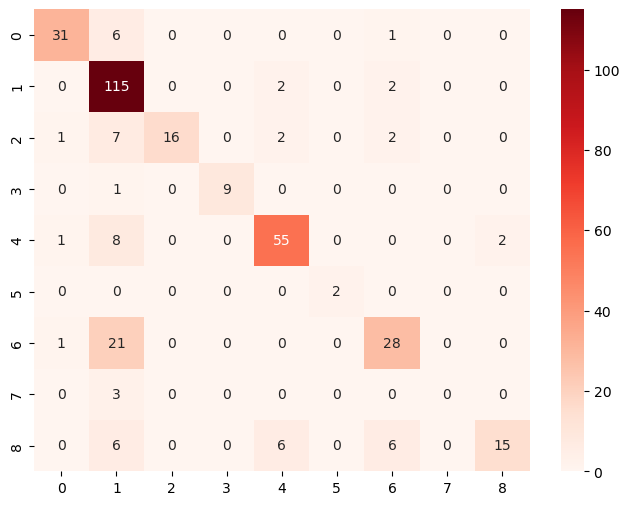

In [181]:
    from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

### LogisticRegression

In [182]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [183]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        38
           1       0.75      1.00      0.86       119
           2       1.00      0.71      0.83        28
           3       1.00      0.80      0.89        10
           4       0.97      0.94      0.95        66
           5       1.00      1.00      1.00         2
           6       0.81      0.76      0.78        50
           7       1.00      0.00      0.00         3
           8       1.00      0.76      0.86        33

    accuracy                           0.86       349
   macro avg       0.95      0.74      0.77       349
weighted avg       0.88      0.86      0.85       349



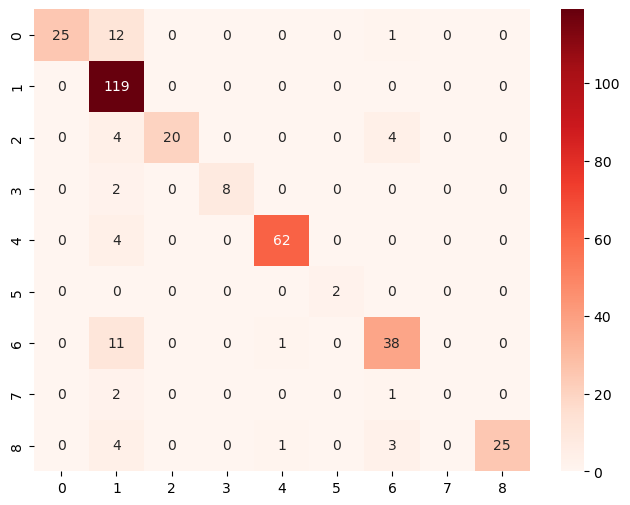

In [184]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

In [185]:
with open('3df_lr.pkl', 'wb') as file:
    pickle.dump(lr, file)